# Project background
## Input: Gene expression files from DESeq2. Each file contains differential gene expression results of a genotype compared to U2AF1 WT + LACZ.
## Obective: Filter all differential expression events by adjusted p value < 0.05. Export log 2 fold change and gene name columns as .RNK for GSEA preranked analysis. 

## Then, plot heatmaps of normalized enrichment scores (NES) from GSEA predictions

In [1]:
import pandas as pd 
import numpy as np 
import scipy
from matplotlib.colors import ListedColormap
import scikit_posthocs
import statannot
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
sns.set(font_scale=1.4)
matplotlib.rcParams['pdf.fonttype'] = 42

## import log2fc filtered by padj > 0.05 only into dataframes and export as RNK file

In [14]:
u2af1s34flacz_vs_wtlacz = pd.read_csv('~/Desktop/c1c2filtered_u2af1s34f_lacz_vs_wtlacz_res', sep=',')
u2af1s34fkv12_vs_wtlacz = pd.read_csv('~/Desktop/c1c2filtered_u2af1s34f_kv12_vs_wtlacz_res', sep=',')
u2af1wtkv12_vs_wtlacz = pd.read_csv('~/Desktop/c1c2filtered_u2af1wtkv12_lacz_vs_wtlacz_res', sep=',') 

dflist = [u2af1s34fkv12_vs_wtlacz, u2af1s34flacz_vs_wtlacz, u2af1wtkv12_vs_wtlacz]

for df in dflist:
    #change name of genes column to genes
    df = df.rename(columns = {'Unnamed: 0':'#Gene'}, inplace = True)

for df in dflist:    
    df = df.loc[(df['padj'] < 0.05)]

#drop all columns except log2fc
u2af1s34fkv12_df = u2af1s34fkv12_vs_wtlacz.drop(['baseMean','lfcSE','stat','pvalue','padj'], axis=1)
u2af1s34f_df = u2af1s34flacz_vs_wtlacz.drop(['baseMean','lfcSE','stat','pvalue','padj'], axis=1)
u2af1wtkv12_df = u2af1wtkv12_vs_wtlacz.drop(['baseMean','lfcSE','stat','pvalue','padj'], axis=1)

#export as .RNK file with columne 1 = gene name, columne 2 = p values. do not need to order them, gsea will do that for you
#one rnk file per condition

# u2af1s34fkv12_df.to_csv('c1c2_log2fcu2af1s34f_krasg12v_vs_wtlacz.RNK', sep='\t', index=False)
# u2af1s34f_df.to_csv('c1c2_log2fcu2af1s34flacz_vs_wtlacz.RNK', sep='\t', index=False)
# u2af1wtkv12_df.to_csv('c1c2_log2fcu2af1wtkv12_vs_wtlacz.RNK', sep='\t', index=False)

# print('done')

# plot heatmap for Hallmark enrichment scores

/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_2415/4216800038.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df = df.rename(columns = {'NAME':'Gene set'}, inplace = True)
/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_2415/4216800038.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtereds34flacz['Comparison'] = 'U2AF1 S34F LACZ'
/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_2415/4216800038.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

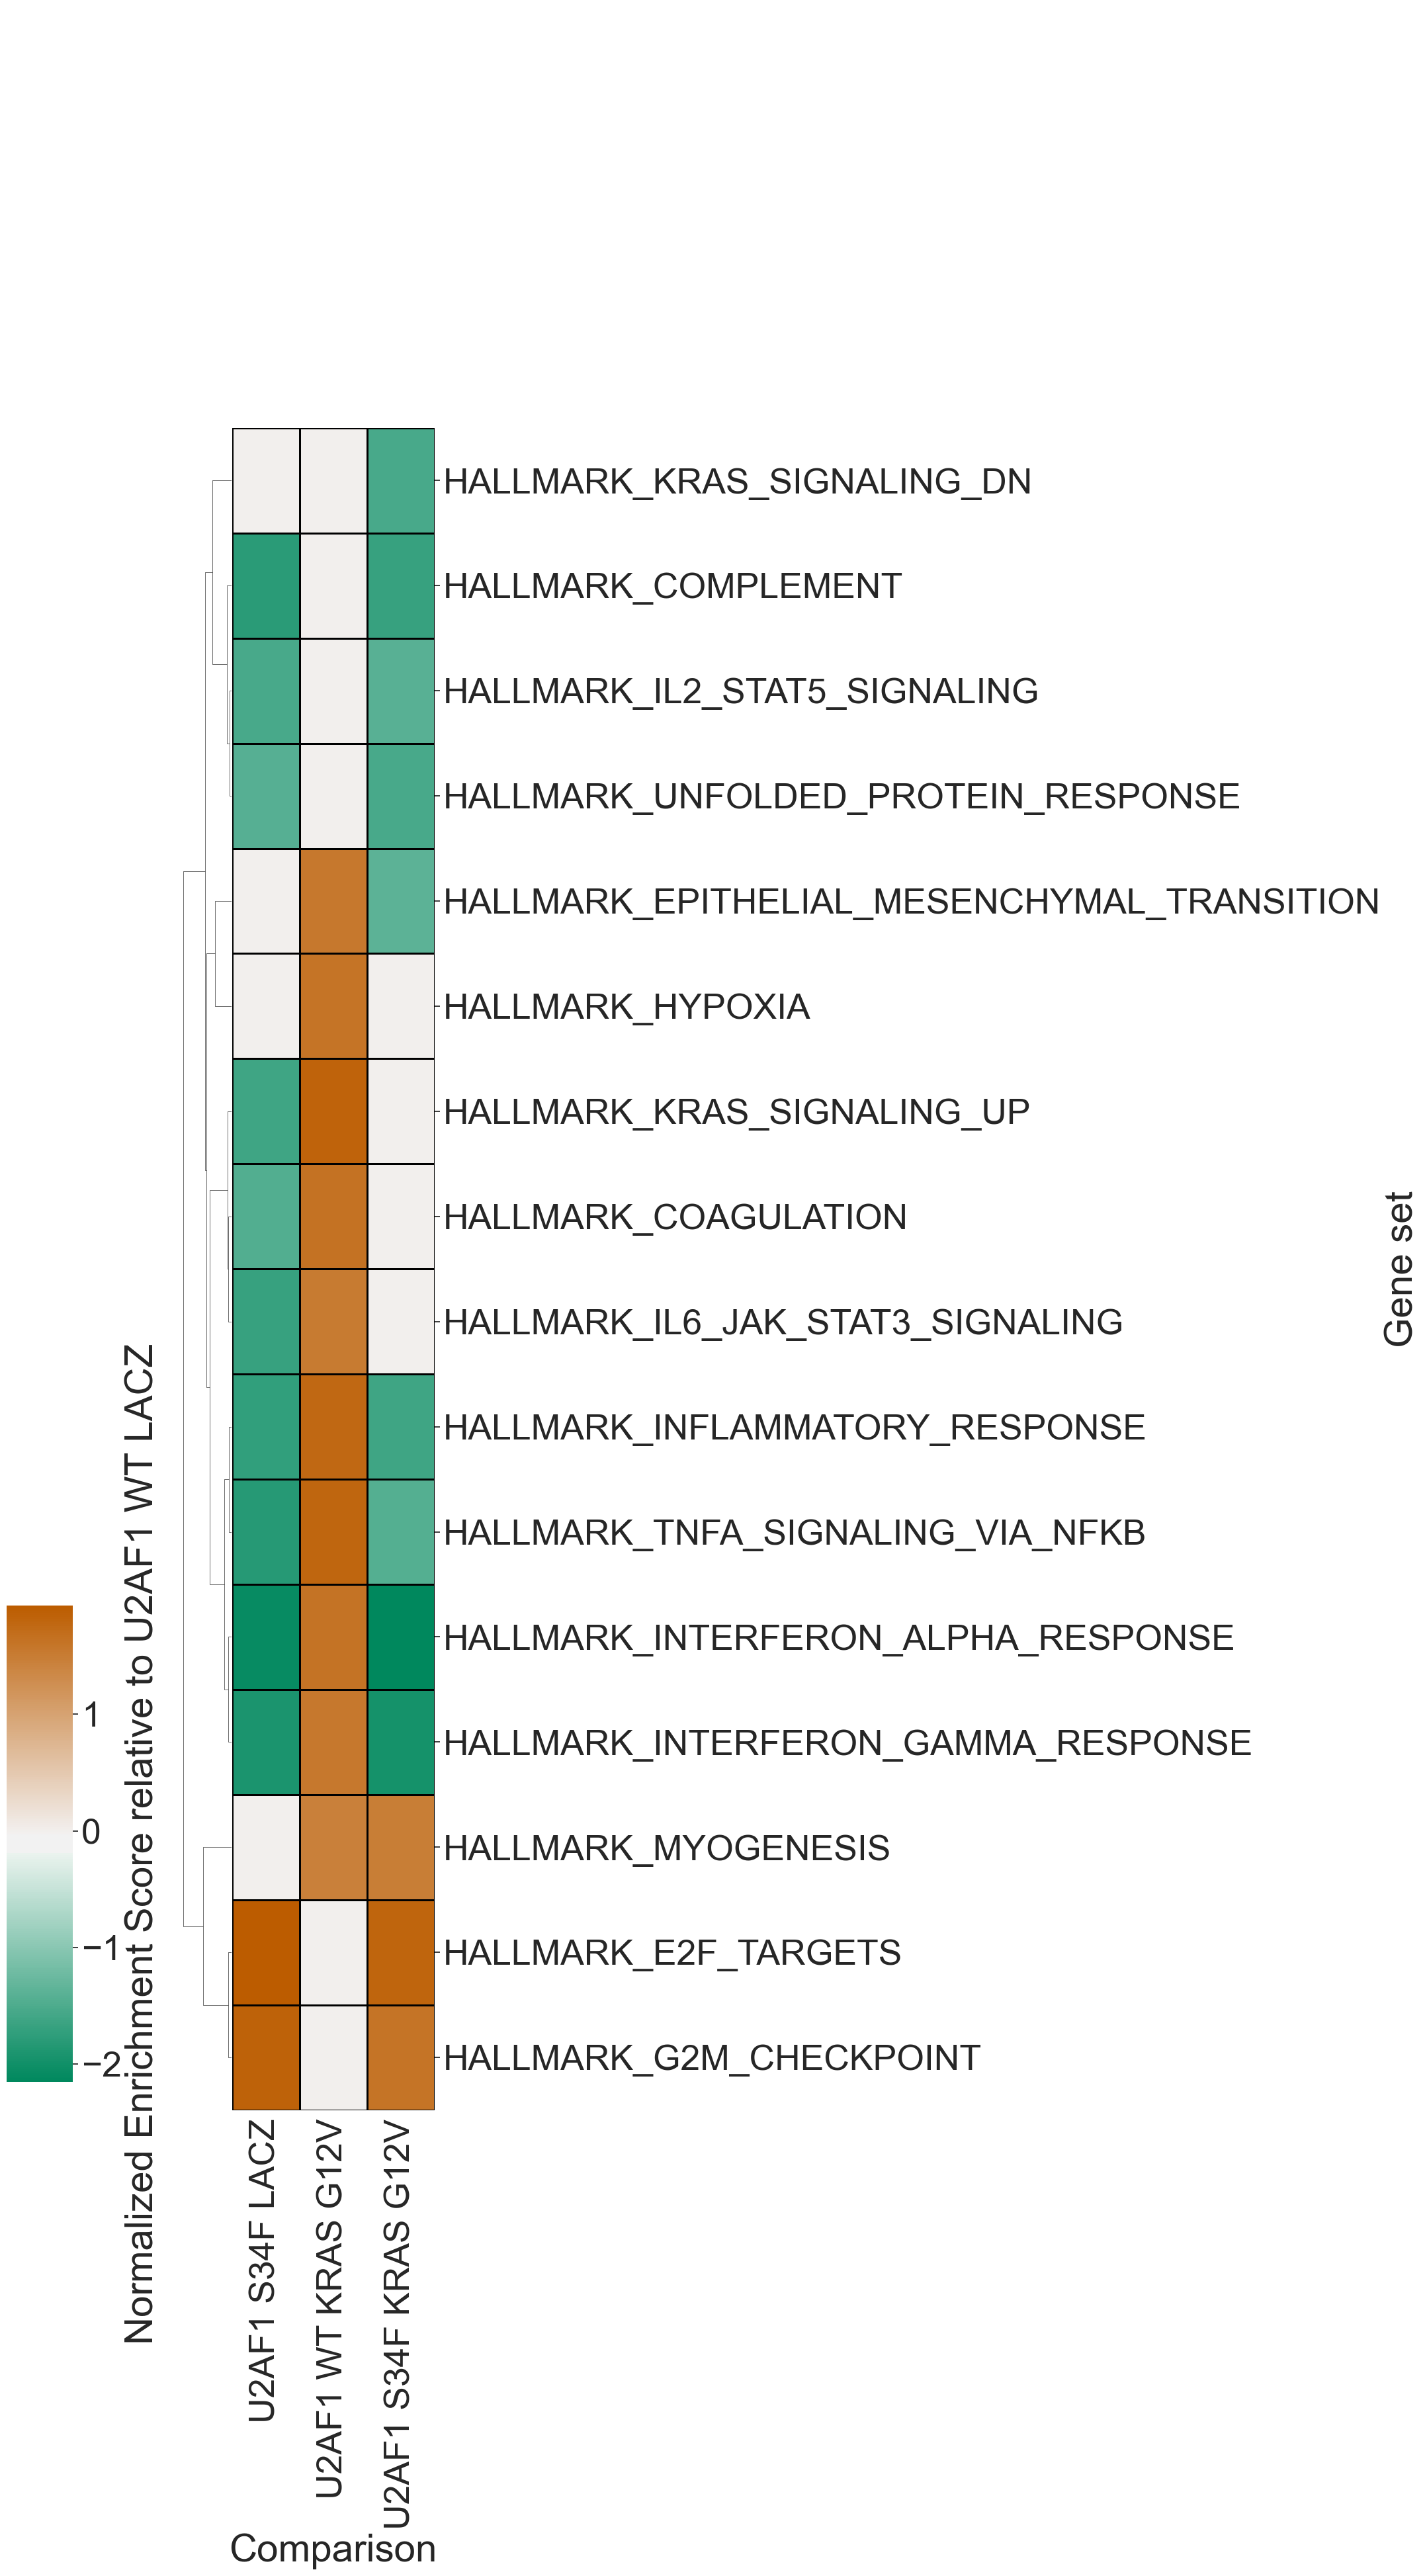

In [2]:
#for both clones combined in all genotypes

sns.set(font_scale=3.5)

s34flacz_pos = pd.read_csv('/Users/liang1/gsea_home/output/jan13/c1c2hallmark_s34flacz_analysis.GseaPreranked.1705183985533/gsea_report_for_na_pos_1705183985533.tsv', sep='\t')
wtkv12_pos = pd.read_csv('/Users/liang1/gsea_home/output/jan13/c1c2hallmark_wtkv12_analysis.GseaPreranked.1705183959257/gsea_report_for_na_pos_1705183959257.tsv', sep='\t')
s34fkv12_pos = pd.read_csv('/Users/liang1/gsea_home/output/jan13/c1c2hallmark_s34fkv12_analysis.GseaPreranked.1705184008318/gsea_report_for_na_pos_1705184008318.tsv', sep='\t')

s34flacz_neg = pd.read_csv('/Users/liang1/gsea_home/output/jan13/c1c2hallmark_s34flacz_analysis.GseaPreranked.1705183985533/gsea_report_for_na_neg_1705183985533.tsv', sep='\t')
wtkv12_neg = pd.read_csv('/Users/liang1/gsea_home/output/jan13/c1c2hallmark_wtkv12_analysis.GseaPreranked.1705183959257/gsea_report_for_na_neg_1705183959257.tsv', sep='\t')
s34fkv12_neg = pd.read_csv('/Users/liang1/gsea_home/output/jan13/c1c2hallmark_s34fkv12_analysis.GseaPreranked.1705184008318/gsea_report_for_na_neg_1705184008318.tsv', sep='\t')

#concat pos and neg results
s34flacz = pd.concat([s34flacz_pos, s34flacz_neg], ignore_index=True)
wtkv12 = pd.concat([wtkv12_pos, wtkv12_neg], ignore_index=True)
s34fkv12 = pd.concat([s34fkv12_pos, s34fkv12_neg], ignore_index=True)

#drop irrelevant columns
dfs = [s34flacz, wtkv12, s34fkv12]
for df in dfs:
    df = df.drop(['GS<br> follow link to MSigDB','GS DETAILS','SIZE','ES','FWER p-val', 'RANK AT MAX',
                 'LEADING EDGE', 'Unnamed: 11'], axis=1, inplace=False)
    
#filter for p val < 0.05 and fdr < 0.25
filtereds34flacz = s34flacz.loc[(s34flacz['NOM p-val'] < 0.05) & (s34flacz['FDR q-val'] < 0.25)]
filteredwtkv12 = wtkv12.loc[(wtkv12['NOM p-val'] < 0.05) & (wtkv12['FDR q-val'] < 0.25)]
filtereds34fkv12 = s34fkv12.loc[(s34fkv12['NOM p-val'] < 0.05) & (s34fkv12['FDR q-val'] < 0.25)]

#rename NAME to be gene set and add genotype label
dflist = [filtereds34flacz, filteredwtkv12, filtereds34fkv12]
for df in dflist:
    df = df.rename(columns = {'NAME':'Gene set'}, inplace = True)
    filtereds34flacz['Comparison'] = 'U2AF1 S34F LACZ'
    filteredwtkv12['Comparison'] = 'U2AF1 WT KRAS G12V'
    filtereds34fkv12['Comparison'] = 'U2AF1 S34F KRAS G12V'

#concat dataframes
s34flacz_wtkv12 = pd.concat([filtereds34flacz, filteredwtkv12], ignore_index=True)
s34flacz_wtkv12_s34fkv12 = pd.concat([filtereds34fkv12, s34flacz_wtkv12], ignore_index=True)
s34flacz_wtkv12_s34fkv12

#pivot dataframes for heatmap
heatmap_df = pd.pivot_table(s34flacz_wtkv12_s34fkv12, values='NES', index='Gene set', columns='Comparison')

#reorder columns for plotting
column_order = ['U2AF1 S34F LACZ', 'U2AF1 WT KRAS G12V', 'U2AF1 S34F KRAS G12V']
heatmap_df = heatmap_df.reindex(column_order, axis=1)


#check if there's anything with value = 0
# heatmap_df[heatmap_df.isin([0]).any(axis=1)] #got nothing, so replace NAs with 0

heatmap_df = heatmap_df.fillna(0)

cg = sns.clustermap(heatmap_df, figsize=(20, 40), xticklabels=True, yticklabels=True, col_cluster=False, linecolor='black', 
               linewidths = 1, cmap=sns.diverging_palette(150, 30, s=100, sep=10, n=9, as_cmap=True), 
                    cbar_kws = {'label':'Normalized Enrichment Score relative to U2AF1 WT LACZ'}, 
                    cbar_pos=(-.1, .2, 0.05, 0.18))

cg.savefig("Downloads/geneexp_hallmark_heatmap.pdf", format='pdf', transparent=True)

In [3]:
heatmap_df

Comparison,U2AF1 S34F LACZ,U2AF1 WT KRAS G12V,U2AF1 S34F KRAS G12V
Gene set,,,
HALLMARK_COAGULATION,-1.462341,1.630992,0.000000
HALLMARK_COMPLEMENT,-1.787937,0.000000,-1.673063
HALLMARK_E2F_TARGETS,1.932124,0.000000,1.818569
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,0.000000,1.550424,-1.379951
HALLMARK_G2M_CHECKPOINT,1.840815,0.000000,1.603816
HALLMARK_HYPOXIA,0.000000,1.606811,0.000000
HALLMARK_IL2_STAT5_SIGNALING,-1.533863,0.000000,-1.412862
HALLMARK_IL6_JAK_STAT3_SIGNALING,-1.675316,1.525412,0.000000
HALLMARK_INFLAMMATORY_RESPONSE,-1.722711,1.766050,-1.614531


# plot gene level heatmap of specific gene set genes
## Stress granule gene list obtained from [Biancon et al. 2022](https://pubmed.ncbi.nlm.nih.gov/35303483/)
## HALLMARK_KRAS_SIGNALING_DN gene set list obtained from [GSEA site](https://www.gsea-msigdb.org/gsea/msigdb/cards/HALLMARK_KRAS_SIGNALING_DN)

In [3]:
#Stress granule protein gene list
sgproteindf = pd.read_csv('Protein_sgs.GMX', sep='\t')

sg1 = sgproteindf['SG_pr Markmiller_4'].tolist()
sg2 = sgproteindf['SG_pr Jain_1'].tolist()
sg3 = sgproteindf['SG_pr Jain_2'].tolist()
sg4 = sgproteindf['SG_pr Khong'].tolist()
sg5 = sgproteindf['SG_pr Markmiller_1'].tolist()
sg6 = sgproteindf['SG_pr Markmiller_2'].tolist()
sg7 = sgproteindf['SG_pr Markmiller_3'].tolist()
sg8 = sgproteindf['SG_pr Markmiller_4'].tolist()
sg9 = sgproteindf['SG_pr MarmorKollet_1'].tolist()
sg10 = sgproteindf['SG_pr MarmorKollet_2'].tolist()
sg11 = sgproteindf['SG_pr Youn'].tolist()


proteinSGscombined = sg1 + sg2 + sg3 + sg4 + sg5 + sg6 + sg7 + sg8 + sg9 + sg10 + sg11
    
proteinSGscombined = [i for i in proteinSGscombined if i != 'na']
proteinSGscombined = [i for i in proteinSGscombined if str(i) != 'nan']

proteinSGset = set(proteinSGscombined)

#get KRAS DN genes into list

KRASDNstr = 'ABCB11,ABCG4,ACTC1,COQ8A,ADRA2C,AKR1B10,ALOX12B,AMBN,ARHGDIG,ARPP21,ASB7,ATP4A,ATP6V1B1,BARD1,BMPR1B,BRDT,BTG2,C5,CACNA1F,CACNG1,CALCB,CALML5,CAMK1D,CAPN9,CCDC106,VPS50,CCNA1,CCR8,CD207,CD40LG,CD80,CDH16,CDKAL1,CELSR2,CHRNG,CHST2,CKM,CLDN16,CLDN8,CLPS,CLSTN3,CNTFR,COL2A1,COPZ2,CPA2,CPB1,CPEB3,CYP11B2,CYP39A1,DCC,DLK2,DTNB,EDAR,EDN1,EDN2,EFHD1,EGF,ENTPD7,EPHA5,ZC2HC1C,TENT5C,FGF16,FGF22,FGFR3,FGGY,FSHB,GAMT,GDNF,GP1BA,GP2,GPR19,GPR3,GPRC5C,GRID2,GTF3C5,MACROH2A2,HNF1A,HSD11B2,HTR1B,HTR1D,IDUA,IFI44L,IFNG,IGFBP2,IL12B,IL5,INSL5,IRS4,ITGB1BP2,ITIH3,KCND1,KCNE2,KCNMB1,KCNN1,KCNQ2,KLHDC8A,KLK7,KLK8,KRT1,KRT13,KRT15,KRT4,KRT5,LFNG,LGALS7,LYPD3,MAGIX,MAST3,MEFV,MFSD6,KMT2D,MSH5,MTHFR,MX1,MYH7,MYO15A,MYOT,NGB,NOS1,NPHS1,NR4A2,NR6A1,NRIP2,NTF3,NUDT11,TENM2,OXT,P2RX6,P2RY4,PRKN,PAX3,PAX4,PCDHB1,PDCD1,PDE6B,PDK2,PKP1,PLAG1,PNMT,NPY4R,PRODH,PROP1,PTGFR,PTPRJ,RGS11,RIBC2,RSAD2,RYR1,RYR2,SCGB1A1,SCN10A,SELENOP,SERPINA10,SERPINB2,SGK1,SHOX2,SIDT1,SKIL,SLC12A3,SLC16A7,SLC25A23,SLC29A3,SLC30A3,SLC38A3,SLC5A5,SLC6A14,SLC6A3,SMPX,SNCB,SNN,SOX10,SPHK2,SPRR3,SPTBN2,SSTR4,STAG3,SYNPO,TAS2R4,TCF7L1,TCL1A,TEX15,TFAP2B,TFCP2L1,TFF2,TG,TGFB2,TGM1,THNSL2,THRB,TLX1,TNNI3,TSHB,UGT2B17,UPK3B,VPREB1,WNT16,YBX2,YPEL1,ZBTB16,ZNF112'
KRASDNlist =KRASDNstr.split(',')


# Plot single gene level fold changes for KRAS Signaling Down set

[None, None, None, None, None, None]

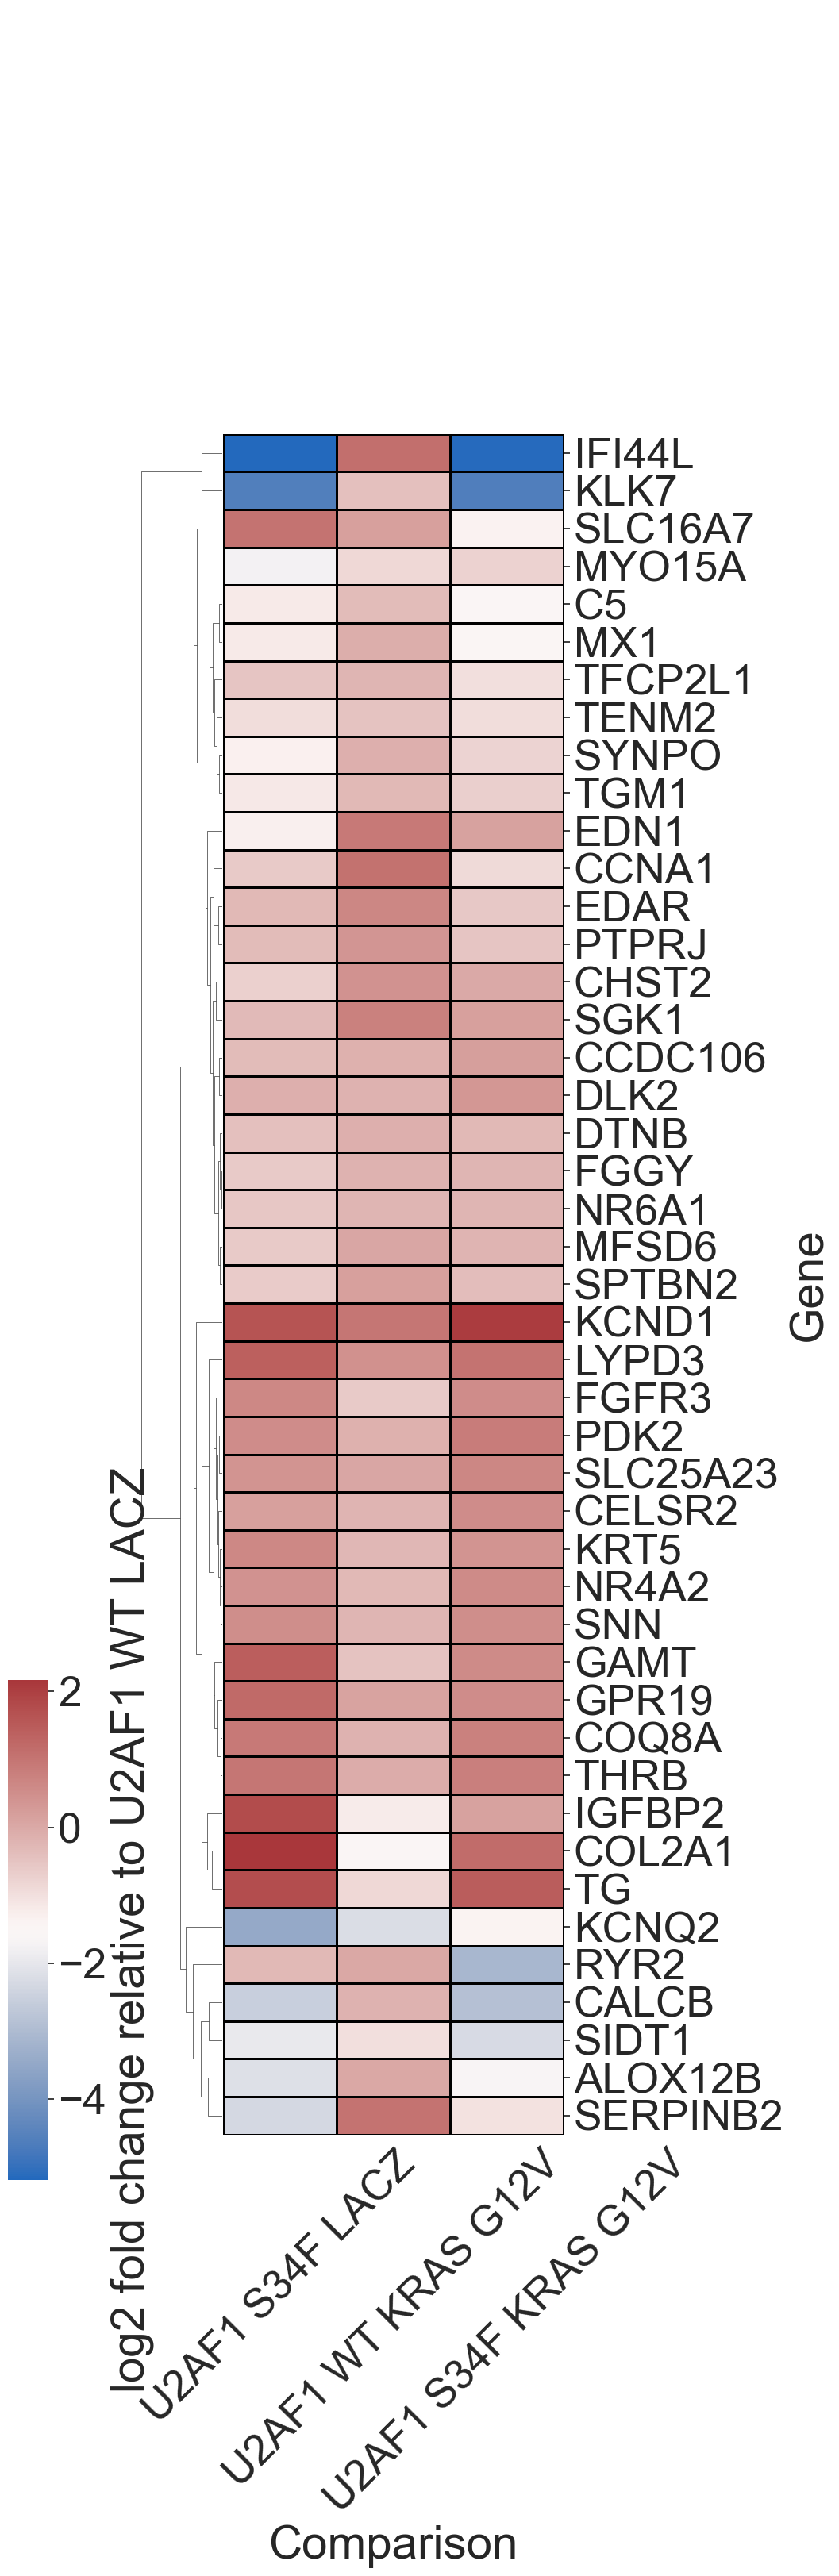

In [13]:
sns.set(font_scale=3.5)

dflist = [u2af1s34fkv12_df, u2af1s34f_df, u2af1wtkv12_df]

for df in dflist:
    df = df.rename(columns = {'#Gene':'Gene'}, inplace = True)
    
u2af1s34f_df['Comparison'] = 'U2AF1 S34F LACZ'
u2af1wtkv12_df['Comparison'] = 'U2AF1 WT KRAS G12V'
u2af1s34fkv12_df['Comparison'] = 'U2AF1 S34F KRAS G12V'

#concat dataframes
s34flacz_wtkv12 = pd.concat([u2af1s34f_df, u2af1wtkv12_df], ignore_index=True)
s34flacz_wtkv12_s34fkv12 = pd.concat([u2af1s34fkv12_df, s34flacz_wtkv12], ignore_index=True)
# s34flacz_wtkv12_s34fkv12

#filter for cols that correspond to gene in KRAS DOWN list
krasdiffexp_df = s34flacz_wtkv12_s34fkv12[s34flacz_wtkv12_s34fkv12['Gene'].isin(KRASDNlist)]

#pivot dataframes for heatmap
heatmap_df = pd.pivot_table(krasdiffexp_df, values='log2FoldChange', index='Gene', columns='Comparison')

#reorder columns for plotting
column_order = ['U2AF1 S34F LACZ', 'U2AF1 WT KRAS G12V', 'U2AF1 S34F KRAS G12V']
heatmap_df = heatmap_df.reindex(column_order, axis=1)


#check if there's anything with value = 0
# heatmap_df[heatmap_df.isin([0]).any(axis=1)]

heatmap_df = heatmap_df.fillna(0)
# heatmap_df

cg = sns.clustermap(heatmap_df, figsize=(10, 35), xticklabels=True, yticklabels=True, col_cluster=False, linecolor='black', 
               linewidths = 1, cmap="vlag", cbar_kws = {'label':'log2 fold change relative to U2AF1 WT LACZ'},
                   cbar_pos=(-.1, .2, 0.05, 0.18))

plt.setp(cg.ax_heatmap.xaxis.get_majorticklabels(), rotation=45)


# Plot single gene level fold changes for stress granule protein genes

[None, None, None, None, None, None]

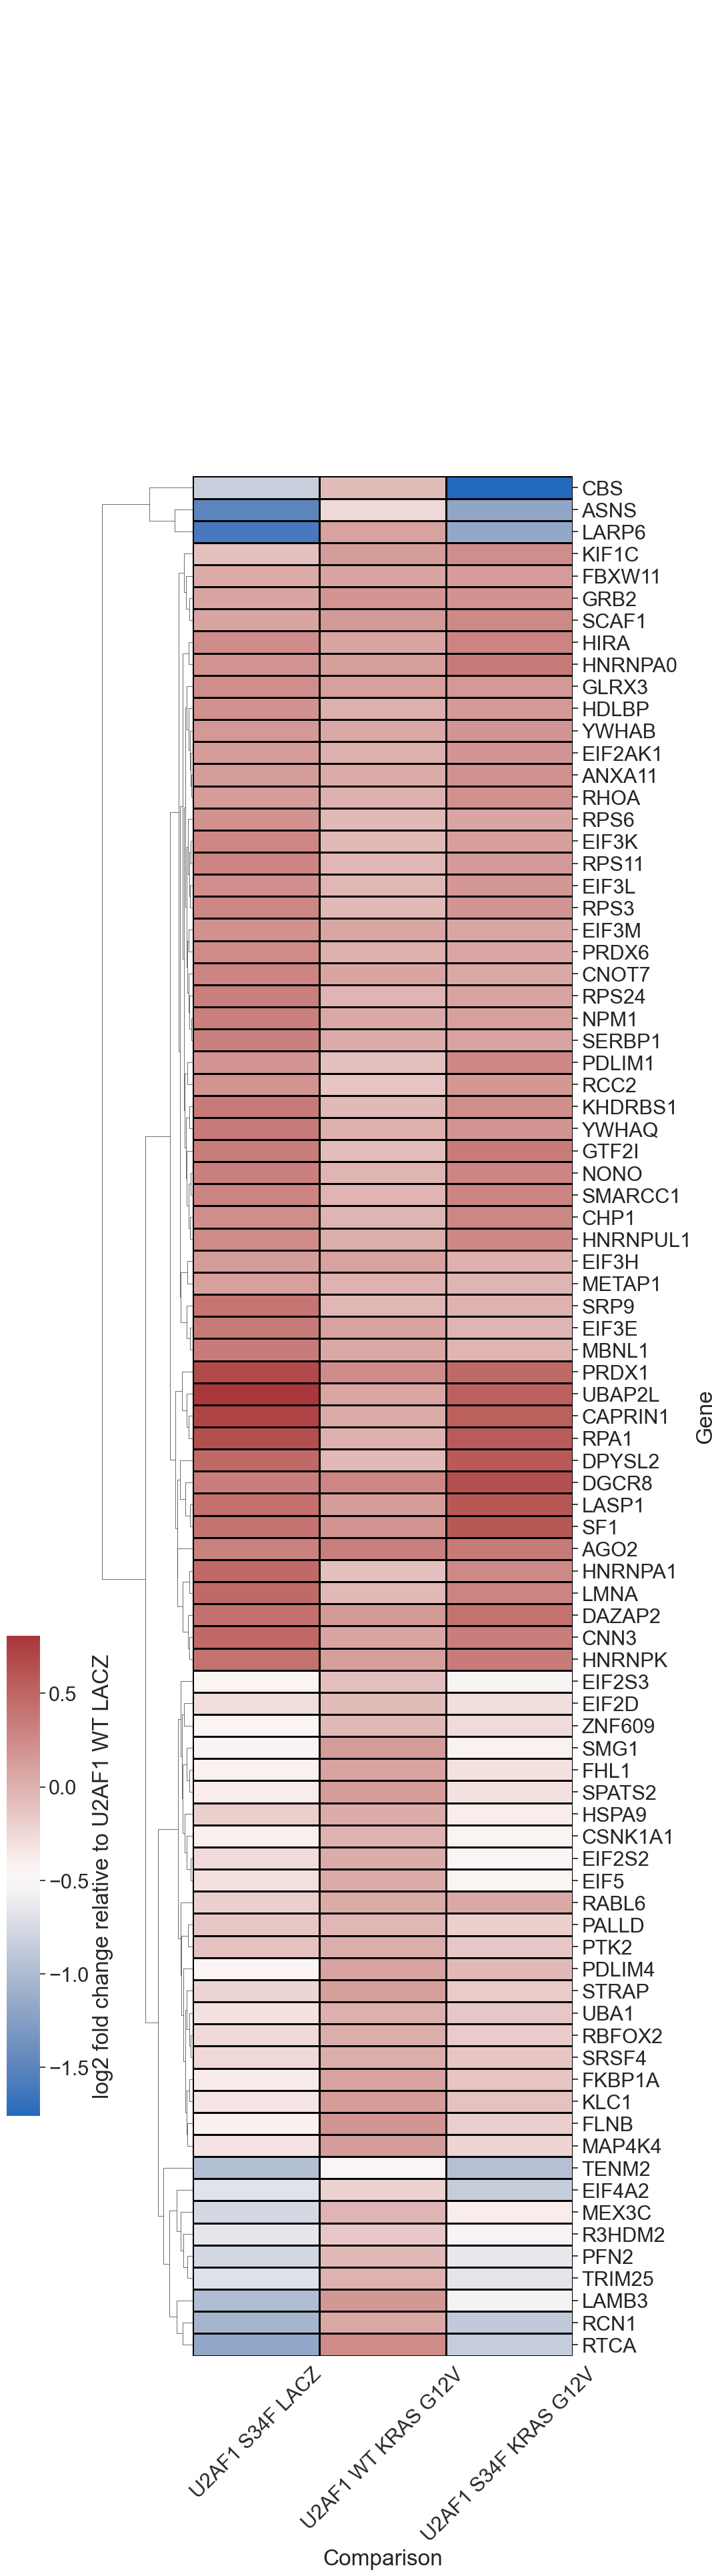

In [21]:
sns.set(font_scale=2)


dflist = [u2af1s34fkv12_df, u2af1s34f_df, u2af1wtkv12_df]

for df in dflist:
    df = df.rename(columns = {'#Gene':'Gene'}, inplace = True)

#load U2AF1 binding gene file
u2af1bind = pd.read_csv('Downloads/Supplementary_Table_3-2.csv')

u2af1_bind_list = u2af1bind['transcript']

u2af1s34f_df = u2af1s34f_df.loc[u2af1s34f_df['Gene'].isin(u2af1_bind_list)]

u2af1wtkv12_df = u2af1wtkv12_df.loc[u2af1wtkv12_df['Gene'].isin(u2af1_bind_list)]

u2af1s34fkv12_df = u2af1s34fkv12_df.loc[u2af1s34fkv12_df['Gene'].isin(u2af1_bind_list)]
    
u2af1s34f_df['Comparison'] = 'U2AF1 S34F LACZ'
u2af1wtkv12_df['Comparison'] = 'U2AF1 WT KRAS G12V'
u2af1s34fkv12_df['Comparison'] = 'U2AF1 S34F KRAS G12V'

#concat dataframes
s34flacz_wtkv12 = pd.concat([u2af1s34f_df, u2af1wtkv12_df], ignore_index=True)
s34flacz_wtkv12_s34fkv12 = pd.concat([u2af1s34fkv12_df, s34flacz_wtkv12], ignore_index=True)
# s34flacz_wtkv12_s34fkv12

#filter for cols that correspond to gene in sg protein 
sg_df = s34flacz_wtkv12_s34fkv12[s34flacz_wtkv12_s34fkv12['Gene'].isin(proteinSGset)]

#pivot dataframes for heatmap
heatmap_df = pd.pivot_table(sg_df, values='log2FoldChange', index='Gene', columns='Comparison')

#reorder columns for plotting
column_order = ['U2AF1 S34F LACZ', 'U2AF1 WT KRAS G12V', 'U2AF1 S34F KRAS G12V']
heatmap_df = heatmap_df.reindex(column_order, axis=1)


#check if there's anything with value = 0
# heatmap_df[heatmap_df.isin([0]).any(axis=1)]

heatmap_df = heatmap_df.fillna(0)
# heatmap_df

cg = sns.clustermap(heatmap_df, figsize=(10, 40), xticklabels=True, yticklabels=True, col_cluster=False, linecolor='black', 
               linewidths = 1, cmap="vlag", cbar_kws = {'label':'log2 fold change relative to U2AF1 WT LACZ'},
                   cbar_pos=(-.1, .2, 0.05, 0.18))

plt.setp(cg.ax_heatmap.xaxis.get_majorticklabels(), rotation=45)


In [16]:
u2af1s34fkv12_df

,#Gene,log2FoldChange
0,A2MP1,-0.081808
1,A4GALT,0.158529
2,AACS,0.629119
3,AADAC,-1.204054
4,AAK1,-0.266900
...,...,...
7017,ZSWIM5,-0.146139
7018,ZSWIM8,0.194042
7019,ZXDC,-0.125301
7020,ZYX,0.247542
